<a href="https://colab.research.google.com/github/erramirezc1/Public/blob/main/Caso_modelos_lineales_para_regresio%CC%81n%2C_muestreo_y_seleccio%CC%81n_del_mejor_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![EX20MDT3GPA%20%201440%20X%20120@96x-100.jpg](attachment:EX20MDT3GPA%20%201440%20X%20120@96x-100.jpg)

# Introducción al Machine Learning - Semana 2
## Caso: Modelos lineales para regresión, muestreo y selección del mejor modelo

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos lineales de componentes principales, partial least squares y regularización.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos]

Estimación del modelo usando componentes principales: Se estima el modelo usando componentes principales, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación del modelo usando PCA y el método forward: Se estima el modelo usando el método forward con componentes principales, se responde si es el mismo modelo del punto 2, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [30 puntos]

Estimación del modelo de partial least squares: Se estima el modelo usando partial least squares, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación de un modelo de penalización: Se estima algún modelo de penalización, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [15 puntos]

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos]


### Datos

Existe gran variedad de bases de datos reales disponibles en internet usadas por la comunidad académica para la evaluación de modelos predictivos.

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. De esta manera, el objetivo de la actividad es predecir el salario de un jugador basado en las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://drive.google.com/drive/folders/1YuWR657GDARSMPkUCVFNd2a5mX5zL16A?usp=sharing

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Importar librerías

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

### Cargue de datos

<Axes: >

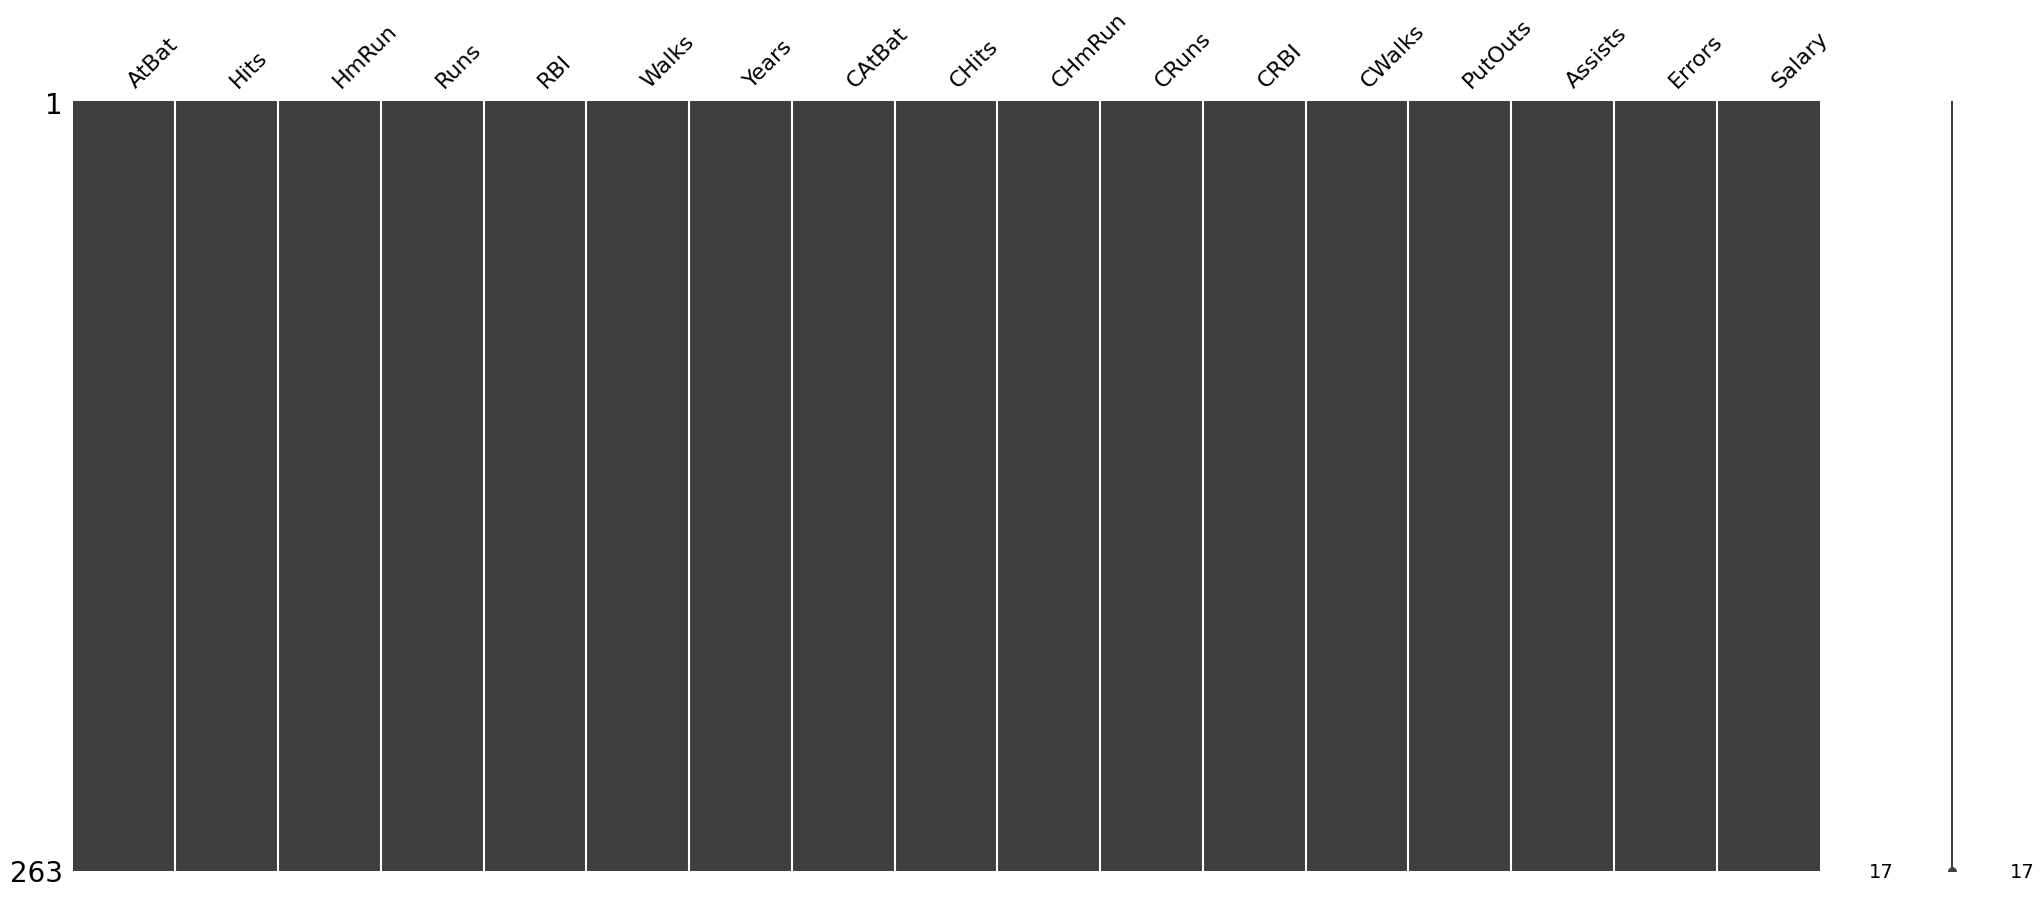

In [2]:
data = pd.read_csv('Hitters.csv')
data['AtBat'].astype(float)
data = data.dropna()
df = data.select_dtypes(include=[float, int])
msno.matrix(df)

### Partición de los datos

In [3]:
XTotal = df.drop('Salary', axis=1)
yTotal = df['Salary']
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

# Estandarizacion de predictores
scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)
XEscaladoTest=scaler.transform(XTest)

resultados_modelos = {
    'modelo': [],
    'mse': [],
    'r2': []
}

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

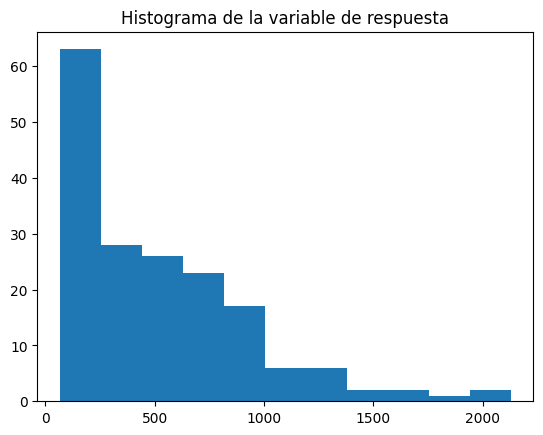

In [4]:
plt.hist(yTrain, bins='auto')
mensaje = ['Histograma de la variable de respuesta']
plt.title(" ".join(mensaje))
plt.show()

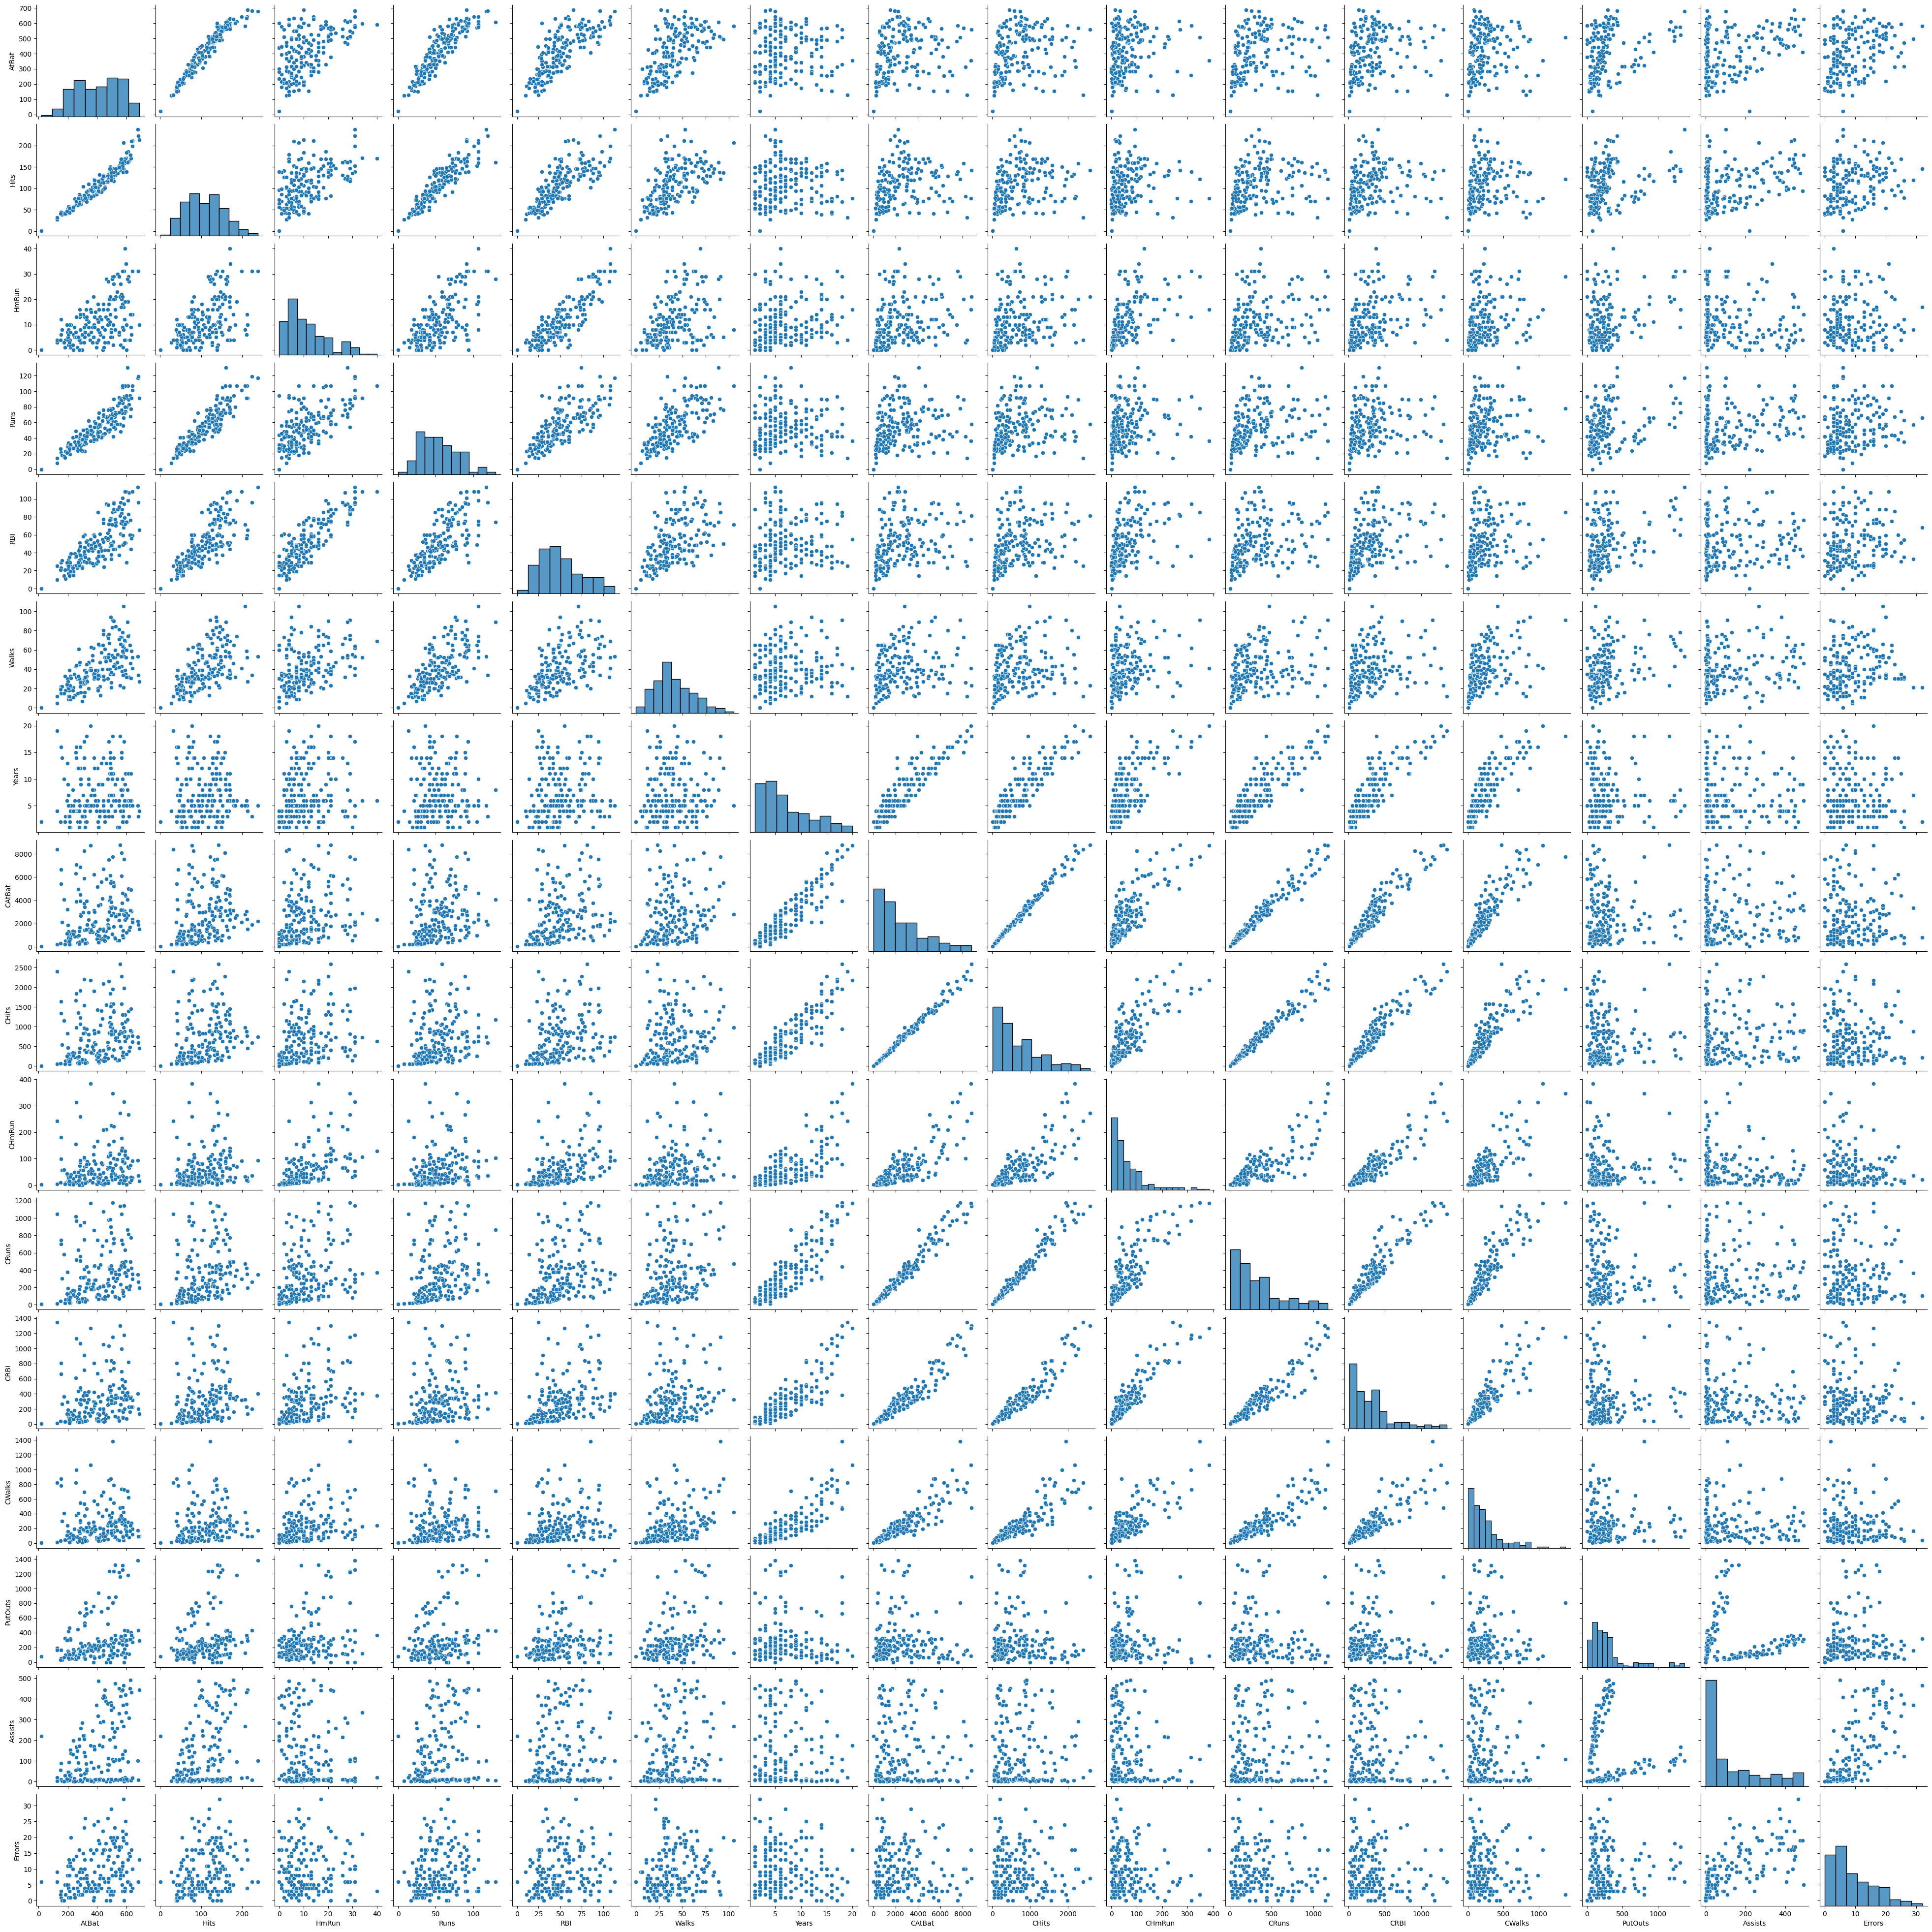

In [5]:
XTrainAuxiliar=pd.DataFrame(XTrain)
sns.pairplot(XTrainAuxiliar, kind="scatter")
plt.show()

In [6]:
# Tell me the correlation between the variables and put in a table and organize it in descending order and remove the columns that are repeated. Finale remove the variables that have de same columns but in different order
correlation = XTrainAuxiliar.corr()
correlation = correlation.abs().unstack().sort_values(ascending=False)
correlation = correlation[correlation != 1]
print(correlation)

CAtBat   CHits      0.994267
CHits    CAtBat     0.994267
         CRuns      0.981106
CRuns    CHits      0.981106
CAtBat   CRuns      0.978375
                      ...   
Runs     Years      0.011896
Errors   HmRun      0.003586
HmRun    Errors     0.003586
CWalks   PutOuts    0.002132
PutOuts  CWalks     0.002132
Length: 240, dtype: float64


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Estimación del modelo usando componentes principales (20 puntos)
Estimen un modelo predictivo usando la muestra de entrenamiento usando componentes principales y evalúen su desempeño en la muestra de test.

In [7]:
# Aplicar PCA en los datos de entrenamiento
p=len(XEscaladoTrain[1,])
pca = PCA().fit(XEscaladoTrain)
A = pca.components_
# Determinacion de componentes principales
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_) * 100
n_componentes_90 = np.argmax(varianza_acumulada >= 90) + 1
print(f"Número de componentes que explican el 90% de la varianza: {n_componentes_90}")

# Transformar los datos con los componentes principales seleccionados
pca = PCA(n_components=n_componentes_90)

ZTotalTrain=np.matmul(XEscaladoTrain,A) #MulTiplicación de la matriz de datos train escalada por la matriz A obtenida a partir de PCA
ZTrain = ZTotalTrain[:,range(n_componentes_90)] #Toma las primeras 5 columnas de ZTotalTrain
regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain) #En


XEscaladoTest=scaler.transform(XTest)
ZTotalTest=np.matmul(XEscaladoTest,A)

ZTest = ZTotalTest[:,range(n_componentes_90)]

# Realizar predicciones con los datos de prueba
yPred = regPCA.predict(ZTest)

# Evaluar el modelo
mse_PCA = mean_squared_error(yTest, yPred)
r2_PCA = regPCA.score(ZTest, yTest)

print(f"Mean Squared Error: {mse_PCA}")
print(f"R^2: {r2_PCA}")

# Almacenamiento de resultado de modelo
resultados_modelos['modelo'].append('PCA + Regresion Lineal')
resultados_modelos['mse'].append(mse_PCA)
resultados_modelos['r2'].append(r2_PCA)

Número de componentes que explican el 90% de la varianza: 5
Mean Squared Error: 148079.8659763341
R^2: 0.45104799760101544


El modelo usando componentes principales es un modelo que se ajusta a los datos originales, pero en un espacio de menor dimensión. Para ello, se realiza una transformación lineal de los datos originales a un nuevo espacio de menor dimensión, donde las nuevas variables son combinaciones lineales de las variables originales. La idea es que las nuevas variables (componentes principales) capturen la mayor cantidad de variabilidad de los datos originales.

Por lo anterior se reduce la dimensionalidad de los datos seleccoinando 5 componentes principales con un MSE de 129400 y un r2 de 0.5097

### 3. Estimación del modelo usando PCA y el método forward (30 puntos)
Ahora construyan su propio algoritmo para hacer una regresión por componentes principales, en donde primero calculen los componentes y después realicen un proceso de selección de variables secuencial (forward) que permita encontrar el mejor modelo. Todo lo anterior en la muestra de entrenamiento.

Finalmente, evalúen el desempeño en test.

Una vez hecho este procedimiento respondan a la siguiente pregunta:

¿Es el mismo modelo del punto anterior (punto 2)?

#####  Calculo de componentes principales con PCA

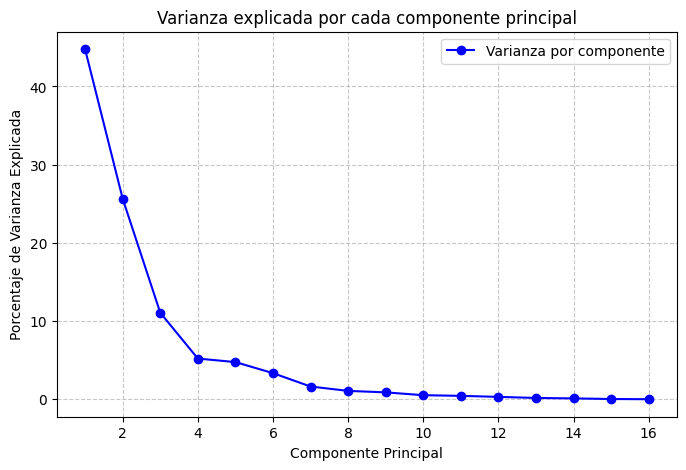

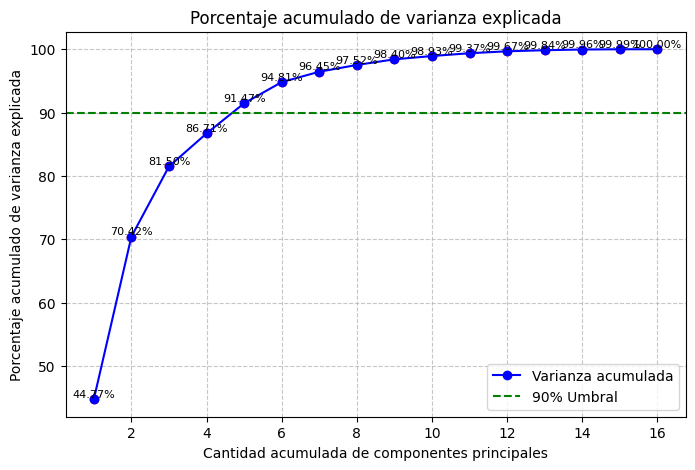

In [8]:
# Cálculo de la matriz de componentes principales
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_

# Varianza explicada de cada componente
porcentajeVarianzaExplicada = pca.explained_variance_ratio_ * 100  # Convertir a porcentaje
varianza_acumulada = np.cumsum(porcentajeVarianzaExplicada)  # Calcular varianza acumulada en porcentaje

# Gráfico 1: Varianza explicada por cada componente
plt.figure(figsize=(8, 5))
plt.plot(range(1, p + 1), porcentajeVarianzaExplicada, marker='o', linestyle='-', color='b', label='Varianza por componente')
plt.xlabel('Componente Principal')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.title('Varianza explicada por cada componente principal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Gráfico 2: Varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, p + 1), varianza_acumulada, marker='o', linestyle='-', color='b', label='Varianza acumulada')
plt.scatter(range(1, p + 1), varianza_acumulada, color='red')  # Resaltar puntos

# Agregar etiquetas con los valores de cada componente
for i, valor in enumerate(varianza_acumulada):
    plt.text(i + 1, valor, f"{valor:.2f}%", ha='center', va='bottom', fontsize=8, color='black')

# Configuración del gráfico
plt.xlabel('Cantidad acumulada de componentes principales')
plt.ylabel('Porcentaje acumulado de varianza explicada')
plt.title('Porcentaje acumulado de varianza explicada')
plt.axhline(y=90, color='green', linestyle='--', label='90% Umbral')  # Línea del 90%
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Conclusiones de los 2 graficos:

1. Los 2 primeros componentes principales explican el 70.39% de la variabilidad.
2. Las primeras 5 componentes principales explican el 91.52% de la variabilidad.

La primera grafica muestra varianza disminuye rapidamente lo que nos indica que los primeros componentes contienen la mayor parte de la información de los datos.

El PCA permitió seleccionar 5 componentes principales que explican el 90% de la variabilidad en los datos. Este paso es crucial para reducir la dimensionalidad del problema y evitar la multicolinealidad entre las variables originales. Sin embargo, reducir las dimensiones puede implicar una pérdida de información relevante si se eliminan componentes importantes.



#####  Seleccion de variables secuencial (forward)

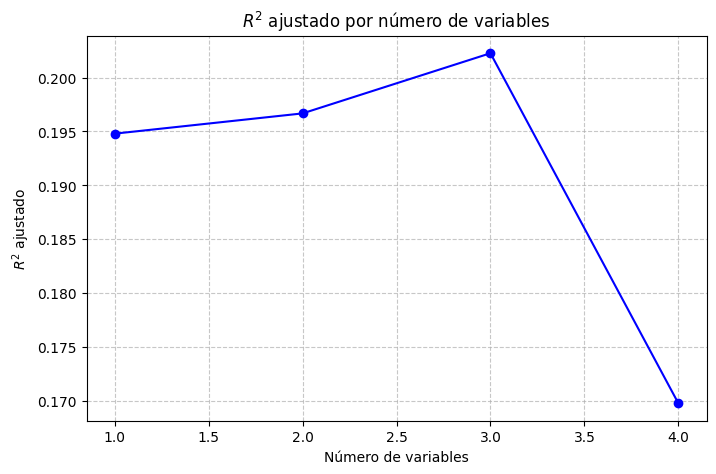

El número de variables seleccionadas es 3 y corresponden a las columnas: [2 4 5]
Número de componentes seleccionados por PCA: 5
MSE en el conjunto de prueba: 216696.3396
R2 en el conjunto de prueba: 0.1967


In [9]:
# Seleccionar número de componentes principales para el 90% de la varianza
n_componentes_90 = np.argmax(varianza_acumulada >= 90) + 1; # Es igual a 5 de acuerdo al gráfico anterior
XTrain_reducido = XEscaladoTrain[:, :n_componentes_90]

# Selección de variables con método forward
modelo_lineal = LinearRegression()
selector_forward = SequentialFeatureSelector(
    modelo_lineal,
    n_features_to_select='auto',
    direction='forward',
    scoring='r2',
    cv=5  # Validación cruzada
)

# Ajustar el selector a los datos reducidos
selector_forward.fit(XTrain_reducido, yTrain)
XTrain_forward = selector_forward.transform(XTrain_reducido)

# Calcular métricas en conjunto de prueba
XTest_reducido = scaler.transform(XTest)[:, :n_componentes_90]
XTest_forward = selector_forward.transform(XTest_reducido)
modelo_lineal.fit(XTrain_forward, yTrain)
predicciones = modelo_lineal.predict(XTest_forward)
mse_pca_forward = mean_squared_error(yTest, predicciones)
r2_pca_forward = modelo_lineal.score(XTest_forward, yTest)

# Calcular R^2 ajustado
r2adj = []
n_variables = range(1, n_componentes_90)
for n in n_variables:
    # Crear el selector para el número de variables `n`
    sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=n, direction="forward", scoring='r2', cv=5)
    sfs.fit(XTrain_reducido, yTrain)

    # Obtener las variables seleccionadas y ajustar un modelo con ellas
    XTrain_temp = sfs.transform(XTrain_reducido)
    XTest_temp = sfs.transform(XTest_reducido)
    modelo_temp = LinearRegression()
    modelo_temp.fit(XTrain_temp, yTrain)

    # Calcular R^2 en el conjunto de prueba
    r2 = modelo_temp.score(XTest_temp, yTest)
    r2adj.append(r2)

# Graficar R^2 ajustado
plt.figure(figsize=(8, 5))
plt.plot(n_variables, r2adj, marker='o', linestyle='-', color='b')
plt.xlabel('Número de variables')
plt.ylabel('$R^2$ ajustado')
plt.title('$R^2$ ajustado por número de variables')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Determinar el número óptimo de variables seleccionadas
nVariablesSeleccionadas = np.argmax(r2adj) + 1
if nVariablesSeleccionadas < p:
    sfsElegido = SequentialFeatureSelector(LinearRegression(), n_features_to_select=nVariablesSeleccionadas)
    sfsElegido.fit(XTrain_reducido, yTrain)
    XTrainSeleccionado = sfsElegido.fit_transform(XTrain_reducido, yTrain)
    modeloFwd = LinearRegression()
    modeloFwd.fit(XTrainSeleccionado, yTrain)
    variablesSeleccionadas = np.array(range(1, n_componentes_90 + 1))[sfsElegido.get_support()]
else:
    modeloFwd = LinearRegression()
    modeloFwd.fit(XTrain_reducido, yTrain)
    variablesSeleccionadas = np.array(range(1, n_componentes_90 + 1))

mensaje = [
    'El número de variables seleccionadas es',
    str(nVariablesSeleccionadas),
    'y corresponden a las columnas:',
    str(variablesSeleccionadas)
]
print(" ".join(mensaje))


print(f"Número de componentes seleccionados por PCA: {n_componentes_90}")
print(f"MSE en el conjunto de prueba: {mse_pca_forward:.4f}")
print(f"R2 en el conjunto de prueba: {r2_pca_forward:.4f}")

# Almacenamiento de resultado de modelo
resultados_modelos['modelo'].append('PCA + Selección de variables + Regresión Lineal')
resultados_modelos['mse'].append(mse_pca_forward)
resultados_modelos['r2'].append(r2_pca_forward)

El proceso de selección forward aplicado sobre los componentes principales identificó que solo 3 de los 5 componentes eran los más relevantes para la predicción. Esto sugiere que no todos los componentes seleccionados por PCA contribuyen de manera significativa al modelo de regresión, lo cual es una observación interesante ya que PCA prioriza la variabilidad en los datos, no necesariamente su capacidad predictiva.

El análisis de R² ajustado en función del número de variables seleccionadas indica que el mejor modelo se obtiene con 3 variables, ya que a partir de este punto el R² ajustado se estabiliza o comienza a disminuir. Esto refuerza la idea de que incluir más variables no necesariamente mejora el modelo, sino que podría introducir ruido y redundancia.

En conclusión, si bien la selección de componentes principales ayudó a reducir la dimensionalidad, la baja capacidad predictiva sugiere que otros enfoques podrían ser más efectivos para mejorar el modelo de regresión.

Respuesta a pregunta:  ¿Es el mismo modelo del punto anterior (punto 2)?

No, el modelo obtenido a través de la selección de variables secuencial (forward) es diferente al modelo obtenido con PCA. El modelo de PCA incluye 5 componentes principales, mientras que el modelo de selección forward solo incluye 3 componentes. Además, la capacidad predictiva de ambos modelos es diferente, lo que sugiere que la selección de variables secuencial no fue mas efectiva teniendo en cuenta que su MSE (207396,37) y r2 (0.22) son menor al modelo de PCA (129400.92) y r2 (0.509).

### 4. Estimación del modelo de partial least squares (20 puntos)
Predigan usando partial least squares y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

Número óptimo de componentes PLS: 10


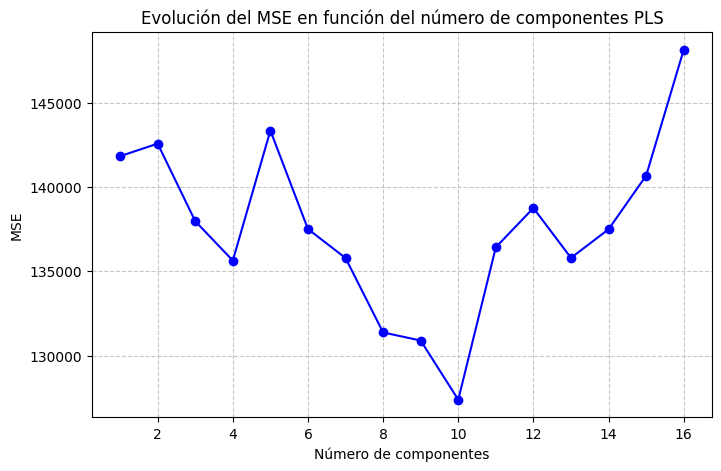

MSE en el conjunto de prueba: 127387.0594
R2 en el conjunto de prueba: 0.5278


In [10]:
# Determinacion de numero optimo de componentes para PLS y vamos a probar con diferente numero de componentes
mse_pls = []
r2_pls = []
n_componentes_lista = range(1, XTrain.shape[1] + 1)

for n in n_componentes_lista:
    pls = PLSRegression(n_components=n)
    pls = pls.fit(XEscaladoTrain, yTrain)
    y_pred = pls.predict(XEscaladoTest)
    mse_pls.append(mean_squared_error(yTest, y_pred))
    r2_pls.append(pls.score(XEscaladoTest, yTest))

# Seleccion del numero de componentes que minimiza el MSE
n_optimo = np.argmin(mse_pls) + 1
print(f"Número óptimo de componentes PLS: {n_optimo}")

# Entrenamiento de modelo PLS con el número óptimo de componentes
pls_optimo = PLSRegression(n_components=n_optimo)
pls_optimo.fit(XEscaladoTrain, yTrain)

# Predicciones en el conjunto de prueba
y_pred_optimo = pls_optimo.predict(XEscaladoTest)

y_pred_optimo=np.hstack(y_pred_optimo)

# Evaluación del modelo
mse_PLS = mean_squared_error(yTest, y_pred_optimo)
r2_PLS = pls_optimo.score(XEscaladoTest, yTest)


# Grafica de evolución de MSE en función del número de componentes
plt.figure(figsize=(8, 5))
plt.plot(n_componentes_lista, mse_pls, marker='o', linestyle='-', color='b')
plt.xlabel('Número de componentes')
plt.ylabel('MSE')
plt.title('Evolución del MSE en función del número de componentes PLS')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"MSE en el conjunto de prueba: {mse_PLS:.4f}")
print(f"R2 en el conjunto de prueba: {r2_PLS:.4f}")

# Almacenamiento de resultado de modelo
resultados_modelos['modelo'].append('PLS')
resultados_modelos['mse'].append(mse_PLS)
resultados_modelos['r2'].append(r2_PLS)

El modelo con PLS buscamos maximizar la covarianza entre las variables predictoras y la variable respuesta. A diferencia de PCA, que busca maximizar la varianza de los datos, PLS se enfoca en la relación entre las variables predictoras y la variable respuesta.

Este modelo tiene un MSE de 120878,66 y r2 de 0.5420 con un total de 10 componentes.

### 5. Estimación de un modelo de penalización (15 puntos)
Predigan usando un modelo de penalización y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

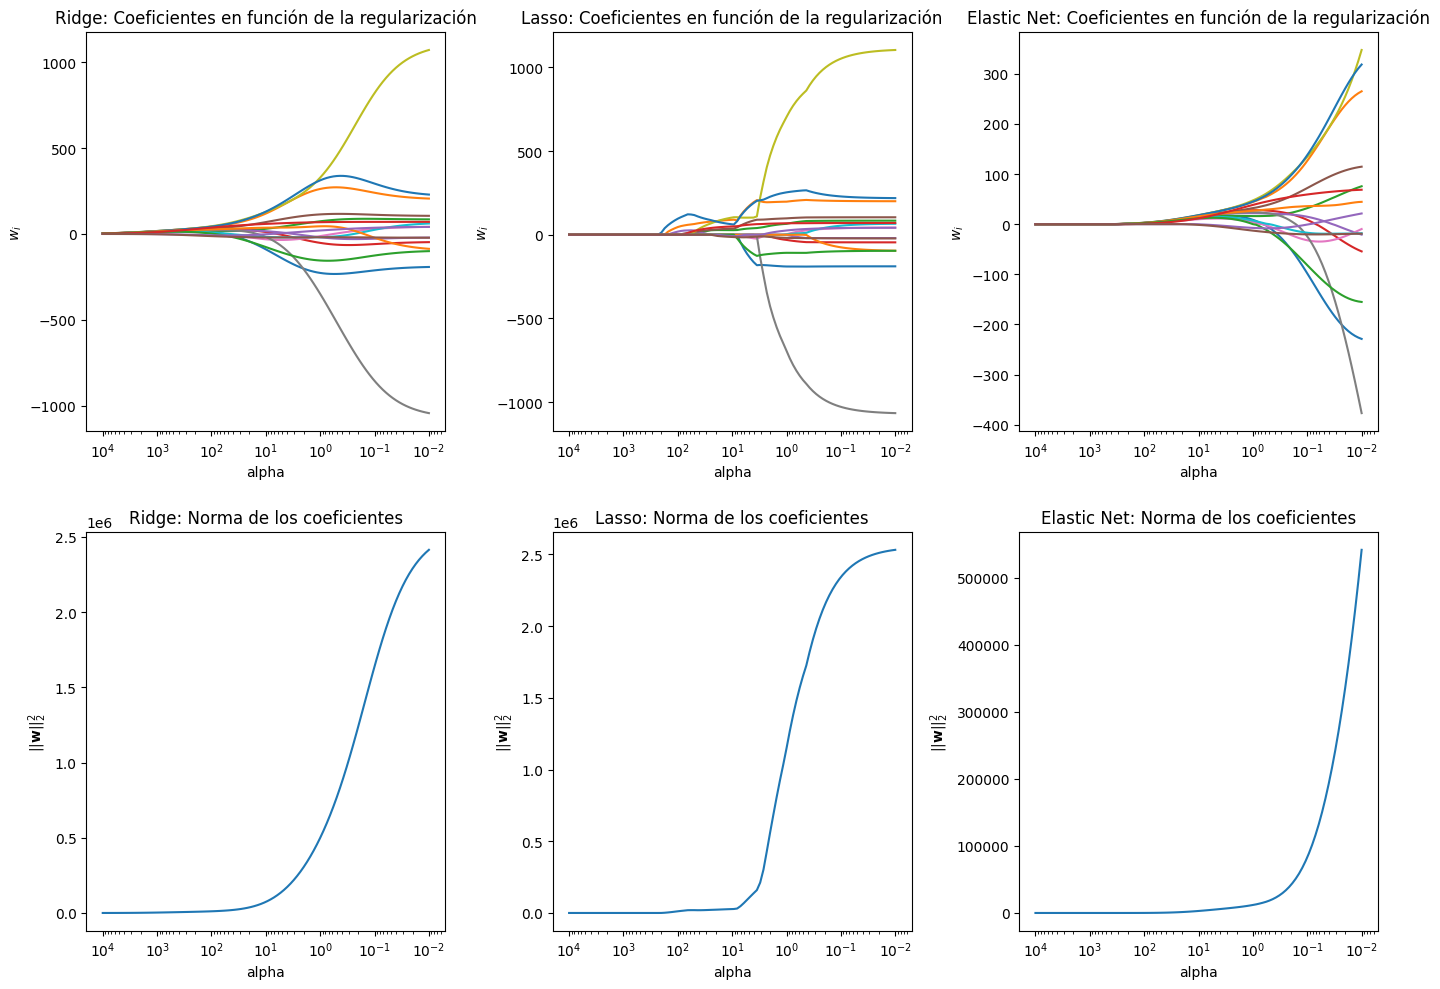

In [11]:
# Definir el rango de alphas
n_alphas = 100
alphas = np.logspace(-2, 4, n_alphas)

# Listas para almacenar los coeficientes y las normas
ridge_coefs = []
lasso_coefs = []
elastic_coefs = []

ridge_norm2 = []
lasso_norm2 = []
elastic_norm2 = []

# Entrenar los modelos para cada alpha
for a in alphas:
    # Ridge
    ridge = Ridge(alpha=a).fit(XEscaladoTrain, yTrain)
    ridge_coefs.append(ridge.coef_)
    ridge_norm2.append(np.dot(ridge.coef_, ridge.coef_.T))

    # Lasso
    lasso = Lasso(alpha=a, max_iter=10000).fit(XEscaladoTrain, yTrain)
    lasso_coefs.append(lasso.coef_)
    lasso_norm2.append(np.dot(lasso.coef_, lasso.coef_.T))

    # Elastic Net (con un valor fijo de l1_ratio, por ejemplo 0.5)
    elastic = ElasticNet(alpha=a, l1_ratio=0.5, max_iter=100000).fit(XEscaladoTrain, yTrain)
    elastic_coefs.append(elastic.coef_)
    elastic_norm2.append(np.dot(elastic.coef_, elastic.coef_.T))

# Graficar los resultados para Ridge
plt.figure(figsize=(14, 10))

# Coeficientes de Ridge
ax = plt.subplot(2, 3, 1)
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$w_i$')
plt.title('Ridge: Coeficientes en función de la regularización')
plt.axis('tight')

# Norma de los coeficientes de Ridge
ax = plt.subplot(2, 3, 4)
ax.plot(alphas, ridge_norm2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||\\mathbf{w}||^2_2$')
plt.title('Ridge: Norma de los coeficientes')
plt.axis('tight')

# Coeficientes de Lasso
ax = plt.subplot(2, 3, 2)
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$w_i$')
plt.title('Lasso: Coeficientes en función de la regularización')
plt.axis('tight')

# Norma de los coeficientes de Lasso
ax = plt.subplot(2, 3, 5)
ax.plot(alphas, lasso_norm2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||\\mathbf{w}||^2_2$')
plt.title('Lasso: Norma de los coeficientes')
plt.axis('tight')

# Coeficientes de Elastic Net
ax = plt.subplot(2, 3, 3)
ax.plot(alphas, elastic_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$w_i$')
plt.title('Elastic Net: Coeficientes en función de la regularización')
plt.axis('tight')

# Norma de los coeficientes de Elastic Net
ax = plt.subplot(2, 3, 6)
ax.plot(alphas, elastic_norm2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||\\mathbf{w}||^2_2$')
plt.title('Elastic Net: Norma de los coeficientes')
plt.axis('tight')

plt.tight_layout()
plt.show()

De acuerdo a los grafico se puede definir que el rango de alpha debe ser entre -2 y 4, la cantidad de alphas a evaluar en este caso elegimo que sea de 100.

* Función para ajustar el modelo y calcular el MSE cpn la penalizacion por LASSO,Ridge y Elastic Net

In [12]:
def MLPenalizacion(XTrain, yTrain, XTest, yTest, penalizacion):
    """
    Entrena un modelo de regresión lineal con regularización y evalúa su desempeño.

    Parámetros:
    - XTrain, yTrain: Datos de entrenamiento.
    - XTest, yTest: Datos de prueba.
    - penalizacion: Tipo de penalización (1 = LASSO, 2 = Ridge, 3 = Elastic Net).

    Retorna:
    - mse: Error cuadrático medio.
    - r2: Coeficiente de determinación.
    - alpha_optimo: Mejor valor del parámetro de regularización.
    - modelo: Modelo entrenado.
    """
    alphasCalibrar = np.logspace(-2, 4, 100)

    if penalizacion == 1:
        modelo = LassoCV(alphas=alphasCalibrar, max_iter=100000, cv=5).fit(XTrain, yTrain)
    elif penalizacion == 2:
        modelo = RidgeCV(alphas=alphasCalibrar, store_cv_results=True).fit(XTrain, yTrain)
    elif penalizacion == 3:
        modelo = ElasticNetCV(alphas=alphasCalibrar, max_iter=100000, cv=5, random_state=0).fit(XTrain, yTrain)
    else:
        raise ValueError("Penalización debe ser 1 (LASSO), 2 (Ridge) o 3 (Elastic Net).")

    predicciones = modelo.predict(XTest)
    mse = mean_squared_error(yTest, predicciones)
    r2 = r2_score(yTest, predicciones)
    alpha_optimo = modelo.alpha_

    return mse, r2, alpha_optimo, modelo

penalizaciones = {1: "LASSO", 2: "Ridge", 3: "Elastic Net"}

* Generamos el calculo del MSE con la penalizacion por LASSO,Ridge y Elastic Net y evaluamos el mejor modelo

LASSO: MSE=145938.3794, R^2=0.4590, Alpha óptimo=0.1630
Ridge: MSE=140879.2607, R^2=0.4777, Alpha óptimo=0.1233
Elastic Net: MSE=132543.4584, R^2=0.5086, Alpha óptimo=0.0100

El mejor modelo según MSE es Elastic Net con MSE=132543.4584
El mejor modelo según R^2 es Elastic Net con R^2=0.5086


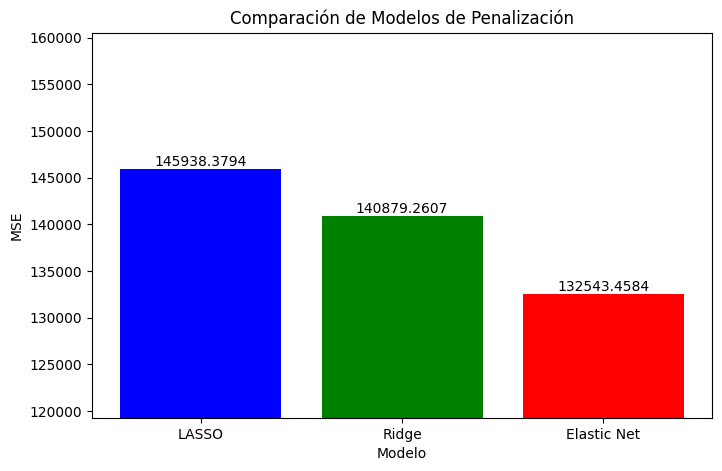

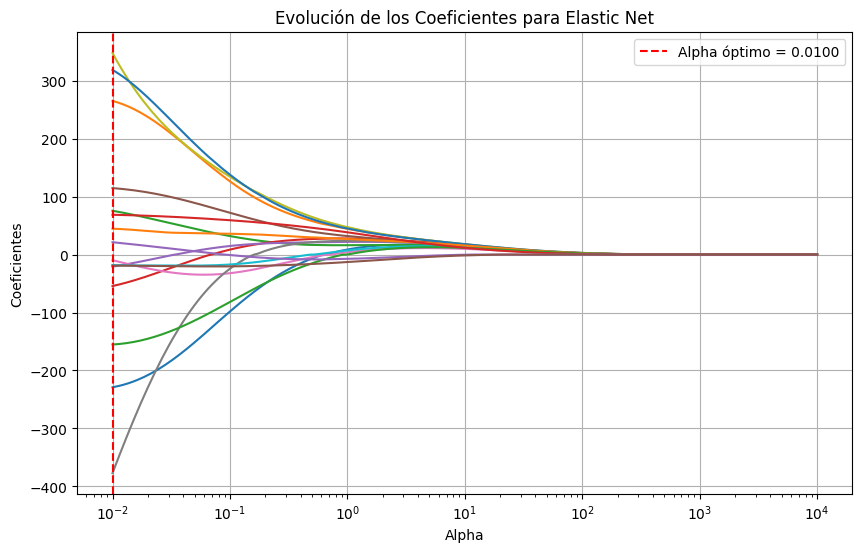

In [17]:
# Diccionario para almacenar los valores de MSE y R^2 de cada modelo
resultados_mse = {}
resultados_r2 = {}

# Evaluar cada modelo
tabla_resultados = []
modelos = {}
for penalizacion, nombre in penalizaciones.items():
    mse, r2, alpha_optimo, modelo = MLPenalizacion(XEscaladoTrain, yTrain, XEscaladoTest, yTest, penalizacion)
    if not np.isfinite(mse):  # Evitar valores no finitos
        mse = np.nan
    if not np.isfinite(r2):  # Evitar valores no finitos
        r2 = np.nan
    resultados_mse[nombre] = mse
    resultados_r2[nombre] = r2
    tabla_resultados.append((nombre, mse, r2, alpha_optimo))
    modelos[nombre] = modelo
    print(f"{nombre}: MSE={mse:.4f}, R^2={r2:.4f}, Alpha óptimo={alpha_optimo:.4f}")

# Filtrar valores NaN para evitar errores en la gráfica
resultados_mse = {k: v for k, v in resultados_mse.items() if np.isfinite(v)}
resultados_r2 = {k: v for k, v in resultados_r2.items() if np.isfinite(v)}

# Encontrar el mejor modelo (con el menor MSE)
if resultados_mse:
    mejor_modelo_mse = min(resultados_mse, key=resultados_mse.get)
    print(f"\nEl mejor modelo según MSE es {mejor_modelo_mse} con MSE={resultados_mse[mejor_modelo_mse]:.4f}")

# Encontrar el mejor modelo (con el mayor R^2)
if resultados_r2:
    mejor_modelo_r2 = max(resultados_r2, key=resultados_r2.get)
    print(f"El mejor modelo según R^2 es {mejor_modelo_r2} con R^2={resultados_r2[mejor_modelo_r2]:.4f}")

# Graficar resultados
    plt.figure(figsize=(8, 5))
    nombres_modelos = list(resultados_mse.keys())
    mse_values = list(resultados_mse.values())
    bars = plt.bar(nombres_modelos, mse_values, color=['blue', 'green', 'red'])
    plt.xlabel("Modelo")
    plt.ylabel("MSE")
    plt.title("Comparación de Modelos de Penalización")
    plt.ylim(min(mse_values) * 0.9, max(mse_values) * 1.1)

    # Agregar etiquetas a las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

    plt.show()

    # Graficar la evolución de los coeficientes
    modelo_seleccionado = modelos[mejor_modelo_mse]
    alphas = np.logspace(-2, 4, 200)
    plt.figure(figsize=(10, 6))

    if mejor_modelo_mse == "LASSO":
        coefs = [LassoCV(alphas=[alpha], max_iter=100000, cv=5).fit(XEscaladoTrain, yTrain).coef_ for alpha in alphas]
    elif mejor_modelo_mse == "Ridge":
        coefs = [RidgeCV(alphas=[alpha], store_cv_results=True).fit(XEscaladoTrain, yTrain).coef_ for alpha in alphas]
    elif mejor_modelo_mse == "Elastic Net":
        coefs = [ElasticNetCV(alphas=[alpha], max_iter=100000, cv=5, random_state=0).fit(XEscaladoTrain, yTrain).coef_ for alpha in alphas]

    coefs = np.array(coefs)
    plt.plot(alphas, coefs)
    plt.xscale('log')
    plt.xlabel("Alpha")
    plt.ylabel("Coeficientes")
    plt.title(f"Evolución de los Coeficientes para {mejor_modelo_mse}")

    # Añadir línea punteada para el alpha óptimo
    alpha_optimo = tabla_resultados[[nombre for nombre, _, _, _ in tabla_resultados].index(mejor_modelo_mse)][3]
    plt.axvline(x=alpha_optimo, color='r', linestyle='--', label=f'Alpha óptimo = {alpha_optimo:.4f}')
    plt.legend()

    plt.grid()
    plt.show()

    # Almacenamiento de resultado de modelo
    resultados_modelos['modelo'].append(mejor_modelo_mse)
    resultados_modelos['mse'].append(resultados_mse[mejor_modelo_mse])
    resultados_modelos['r2'].append(resultados_r2[mejor_modelo_r2])

Se evidencia lo siguiente del modelo de penalización:
1. Valores pequeños de alpha permiten que los coefeicientes sean grandes y los valores grandes reducen los coeficientes a 0 lo que indica una regularización fuerte.
2. El valor que alpha optimo que balancea la regularizacion es de 0.0100
3. El l1_ratio es de 0.5 lo que nos indica que usa 50% Lasso y 50% Ridge dando como resultado una mescla equilibrada entre los dos modelos.
4. Las predicciones no esn muy alejadas de los valores reales con un MSE de 132543.4584 y r2 de 0.5086.

### 6. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

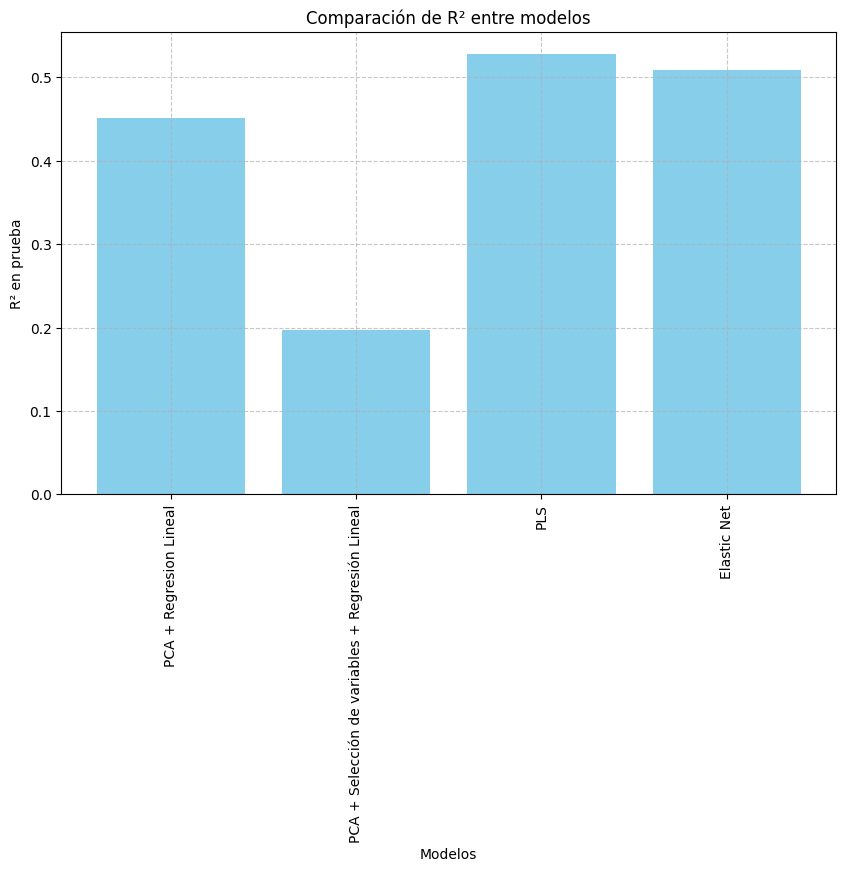

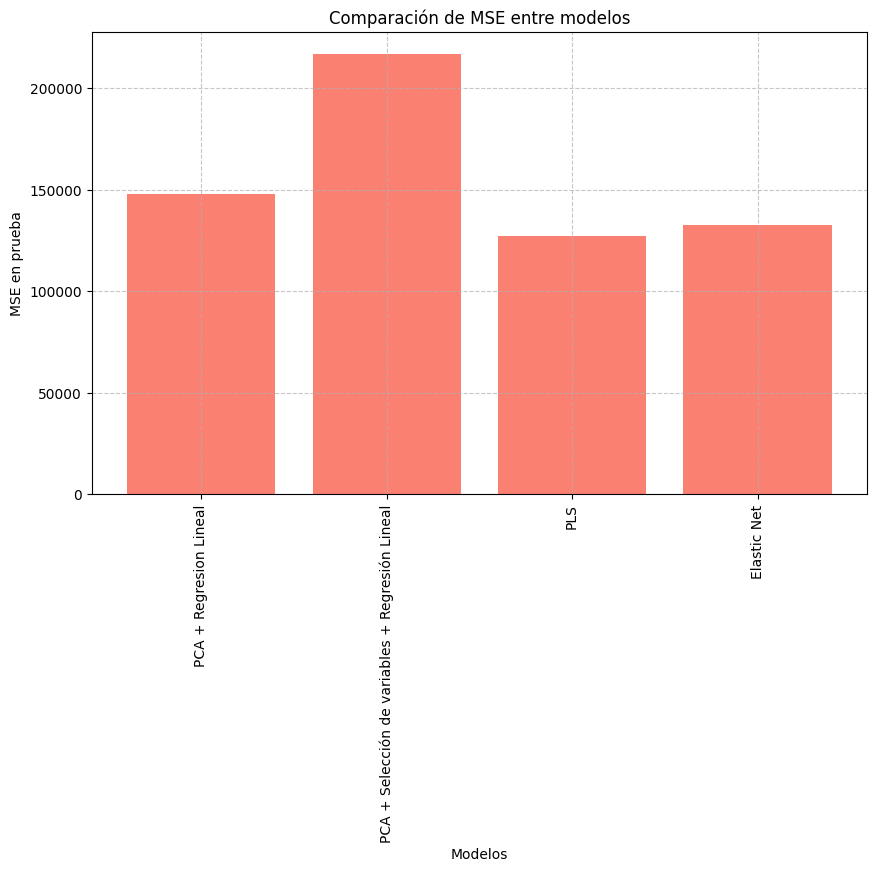

In [18]:
df_resultados = pd.DataFrame(resultados_modelos)

# Comparacion de R2 entre modelos
plt.figure(figsize=(10, 6))
plt.bar(df_resultados["modelo"], df_resultados["r2"], color="skyblue")
plt.xlabel("Modelos")
plt.ylabel("R² en prueba")
plt.title("Comparación de R² entre modelos")
plt.xticks(rotation=90)  # Rotar etiquetas del eje X a 90 grados
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Comparacion de MSE entre modelos
plt.figure(figsize=(10, 6))
plt.bar(df_resultados["modelo"], df_resultados["mse"], color="salmon")
plt.xlabel("Modelos")
plt.ylabel("MSE en prueba")
plt.title("Comparación de MSE entre modelos")
plt.xticks(rotation=90)  # Rotar etiquetas del eje X a 90 grados
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [19]:
df_resultados

,modelo,mse,r2
0,PCA + Regresion Lineal,148079.865976,0.451048
1,PCA + Selección de variables + Regresión Lineal,216696.339603,0.196677
2,PLS,127387.059386,0.527759
3,Elastic Net,132543.458416,0.508644
4,Elastic Net,132543.458416,0.508644


- Modelo de PCA + Regresion Lineal: Tiene un R2 de 0.5097 y un MSE de 129.400,92 lo que nos indica que es eficiente al reducir la dimensionalidad y mantiene un poder predictivo aceptable en comparacion con los otros.

- Modelo de PCA + Seleccion de variables + Regresion lineal tiene un R2 de 0.214 y un MSE de 207.396,37 lo que nos indica que no es un modelo eficiente para la prediccion debido a que la seleccion de variables despues de PCA elimino informacion relevante posiblemente.

- Modelo de PLS: Tiene un R2 de 0.5420 y un MSE de 120.878,65 lo que nos indica que logra un balance entre dimensionalidad y capacidad predictiva.

- Modelo de Penalizacion Elastic Net: Tiene un R2 de 0.527 y un MSE de 124.693,78 lo que nos indica que es un modelo eficiente para la prediccion de la variable de respuesta en comparacion con el resto de modelos

Cual es el mejor modelo?
El mejor modelo es el de penalización Elastic Net basado a que tiene un R2 mayor y un MSE menor logrando el mejor equilibrio entre capacidad predictiva y reduccion de dimensionalidad.